Task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Вхідний файл, який містить дані
input_file = 'income_data.txt'

# Читання даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
  for line in f.readlines():
    if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
      break
    if '?' in line:
      continue

    # Added tabs
    data = line[:-1].split(', ')

    if data[-1] == '<=50K' and count_class1 < max_datapoints:
      X.append(data)
      count_class1 += 1
    if data[-1] == '>50K' and count_class2 < max_datapoints:
      X.append(data)
      count_class2 += 1

# Перетворення на масив numpy
X = np.array(X)

# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(X.shape)

for i,item in enumerate(X[0]):
  if item.isdigit():
    X_encoded[:, i] = X[:, i]
  else:
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:, i] = label_encoder[-1].fit_transform(X[:,i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Створення SVМ-класифікатора
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

# Навчання класифікатора
classifier.fit(X, y)

# Delete 'cross_validation.'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Обчислення F-міри для SVМ-класифікатора
# Delete 'train_test_split.'
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

# Передбачення результату для тестової точки даних
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

# Кодування тестової точки даних
input_data_encoded = [-1] * len(input_data)
count = 0

for i, item in enumerate(input_data):
  if item.isdigit():
    input_data_encoded[i] = int(input_data[i])
  else:
    input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]])[0])
    count += 1

input_data_encoded = np.array(input_data_encoded)

# Використання класифікатора для кодованої точки даних
# та виведення результату
predicted_class = classifier.predict(input_data_encoded.reshape(1, -1))
print(label_encoder[-1].inverse_transform(predicted_class)[0])

F1 score: 76.09%
<=50K


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Передбачення на тестовій вибірці
y_test_pred = classifier.predict(X_test)

# Обчислення метрик
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

# Виведення метрик
print("Оцінки якості класифікації:")
print(f" - Акуратність (Accuracy): {accuracy:.2f}%")
print(f" - Точність (Precision): {precision:.2f}%")
print(f" - Повнота (Recall): {recall:.2f}%")
print(f" - F1-міра: {f1:.2f}%")

Оцінки якості класифікації:
 - Акуратність (Accuracy): 79.56%
 - Точність (Precision): 79.26%
 - Повнота (Recall): 79.56%
 - F1-міра: 75.75%


Task 2

In [8]:
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Вхідний файл, який містить дані
input_file = 'income_data.txt'

# Читання даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue
        data = line[:-1].split(', ')
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1
        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Перетворення на масив numpy
X = np.array(X)

# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Поділ даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Функція для оцінки моделей
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    return accuracy, precision, recall, f1

# Поліноміальне ядро
print("================ Поліноміальне ядро ================")
poly_classifier = OneVsOneClassifier(SVC(kernel='poly', degree=2))
poly_classifier.fit(X_train, y_train)
accuracy, precision, recall, f1 = evaluate_model(poly_classifier, X_test, y_test)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Гаусове (RBF) ядро
print("================ Гаусове (RBF) ядро ================")
rbf_classifier = OneVsOneClassifier(SVC(kernel='rbf'))
rbf_classifier.fit(X_train, y_train)
accuracy, precision, recall, f1 = evaluate_model(rbf_classifier, X_test, y_test)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Сигмоїдальне ядро
print("================ Сигмоїдальне ядро ================")
sigmoid_classifier = OneVsOneClassifier(SVC(kernel='sigmoid'))
sigmoid_classifier.fit(X_train, y_train)
accuracy, precision, recall, f1 = evaluate_model(sigmoid_classifier, X_test, y_test)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

================ Поліноміальне ядро ================
Accuracy: 77.39%
Precision: 81.11%
Recall: 77.39%
F1 Score: 70.18%
================ Гаусове (RBF) ядро ================
Accuracy: 78.19%
Precision: 82.82%
Recall: 78.19%
F1 Score: 71.51%
================ Сигмоїдальне ядро ================
Accuracy: 60.47%
Precision: 60.64%
Recall: 60.47%
F1 Score: 60.55%


Task 3

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Ключі iris_dataset: \n{}".format(iris_dataset.keys()))

print("Назви відповідей:{}".format(iris_dataset['target_names']))
print("Назва ознак: \n{}".format(iris_dataset['feature_names']))
print("Тип масиву data: {}".format(type(iris_dataset['data'])))
print("Форма масиву data:{}".format(iris_dataset['data'].shape))

print("Значення ознак для перших 5 прикладів:\n{}".format(iris_dataset['data'][:5]))

print("Тип масиву target:{}".format(type(iris_dataset['target'])))

print("Відповіді:\n{}".format(iris_dataset['target']))


Ключі iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Назви відповідей:['setosa' 'versicolor' 'virginica']
Назва ознак: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Тип масиву data: <class 'numpy.ndarray'>
Форма масиву data:(150, 4)
Значення ознак для перших 5 прикладів:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Тип масиву target:<class 'numpy.ndarray'>
Відповіді:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Завантаження бібліотек
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# shape
print(dataset.shape)

# Зріз даних head
print(dataset.head(20))

# Стастичні зведення методом describe
print(dataset.describe())

# Розподіл за атрибутом class
print(dataset.groupby('class').size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

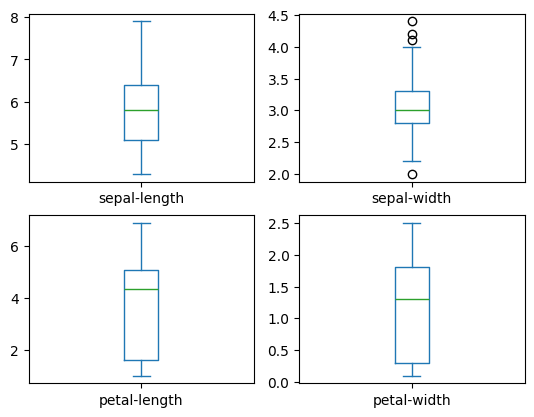

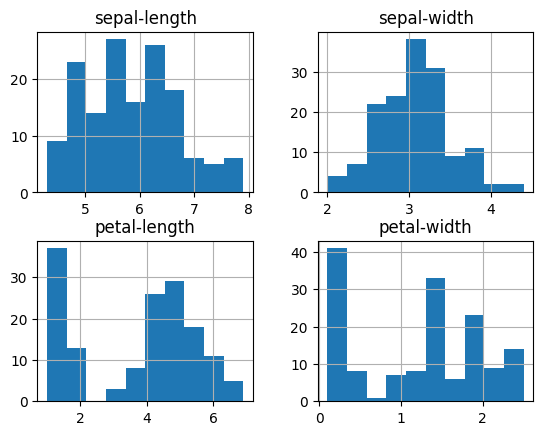

In [10]:
# Діаграма розмаху
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

# Гістограма розподілу атрибутів датасета
dataset.hist()
pyplot.show()


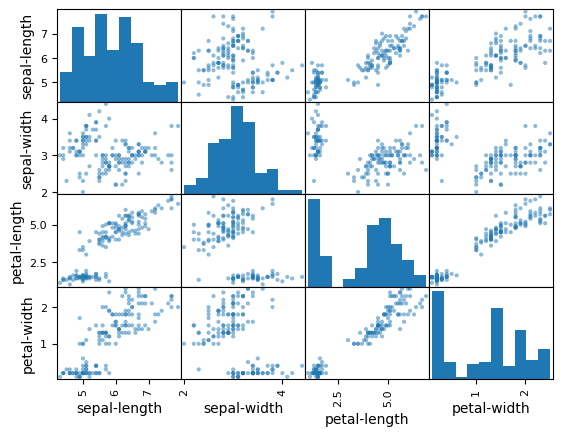

In [11]:
#Матриця діаграм розсіювання
scatter_matrix(dataset)
pyplot.show()

In [13]:
# Розділення датасету на навчальну та контрольну вибірки
array = dataset.values
# Вибір перших 4-х стовпців
X = array[:,0:4]
# Вибір 5-го стовпця
Y = array[:,4]
# Разделение X и y на обучающую и контрольную выборки
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Завантажуємо алгоритми моделі
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))  # multi_class залишено за замовчуванням
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцінюємо модель на кожній ітерації
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


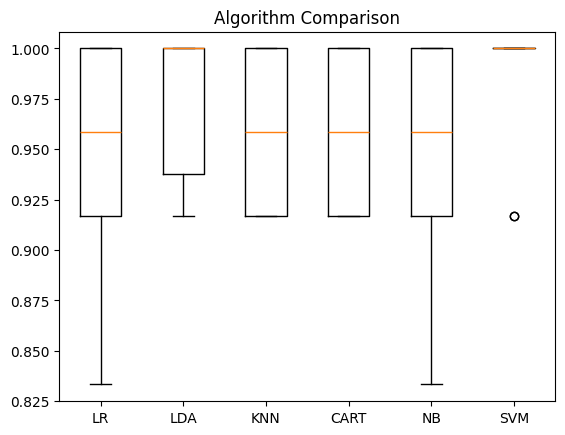

In [23]:
# Порівняння алгоритмів
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [29]:
# Створюємо прогноз на контрольній вибірці
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [32]:
# Оцінюємо прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Завантаження даних набору Iris
iris_dataset = load_iris()

# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=42)

# Створення та навчання моделі k-найближчих сусідів
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Крок 8. Отримання прогнозу для нового зразка
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма масиву X_new: {}".format(X_new.shape))

# Прогноз
prediction = knn.predict(X_new)
predicted_class = iris_dataset['target_names'][prediction][0]

print("Прогноз: {}".format(prediction))
print("Спрогнозована мітка: {}".format(predicted_class))

# Оцінка якості моделі
accuracy = knn.score(X_test, y_test)
print("Точність моделі на тестовому наборі: {:.2f}".format(accuracy))

Форма масиву X_new: (1, 4)
Прогноз: [0]
Спрогнозована мітка: setosa
Точність моделі на тестовому наборі: 1.00


Task 4

LR: 0.7323 (0.0130)
LDA: 0.7455 (0.0166)
KNN: 0.5821 (0.0170)
CART: 0.7624 (0.0129)
NB: 0.6235 (0.0145)
SVM: 0.5061 (0.0064)


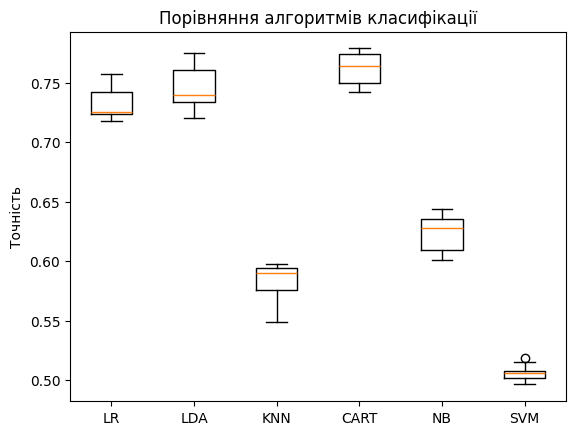

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import preprocessing

# Завантаження даних
input_file = 'income_data.txt'

# Зчитування даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 5000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue

        data = line[:-1].split(', ')
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            y.append(0)  # Клас 0 для <=50K
            count_class1 += 1
        elif data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            y.append(1)  # Клас 1 для >50K
            count_class2 += 1

# Перетворення на масив numpy
X = np.array(X)

# Перетворення рядкових даних на числові
label_encoders = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        le = preprocessing.LabelEncoder()
        X_encoded[:, i] = le.fit_transform(X[:, i])
        label_encoders.append(le)

X = X_encoded[:, :-1].astype(float)
y = np.array(y)

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Список моделей для порівняння
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Оцінка моделей
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

# Візуалізація порівняння
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Порівняння алгоритмів класифікації')
plt.ylabel('Точність')
plt.show()

Task 5

Accuracy: 0.7556
Precision: 0.8333
Recall: 0.7556
F1 Score: 0.7503
Cohen Kappa Score: 0.6431
Matthews Corrcoef: 0.6831

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.44      0.59        18
           2       0.50      0.91      0.65        11

    accuracy                           0.76        45
   macro avg       0.80      0.78      0.75        45
weighted avg       0.83      0.76      0.75        45



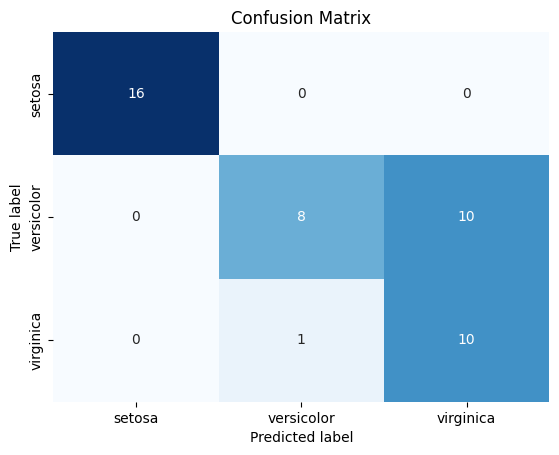

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, matthews_corrcoef,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження набору даних Iris
iris = load_iris()
X, y = iris.data, iris.target

# Розділення даних на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Створення і навчання Ridge-класифікатора
clf = RidgeClassifier(tol=1e-2, solver="sag")
clf.fit(X_train, y_train)

# Прогнозування
y_pred = clf.predict(X_test)

# Розрахунок метрик якості
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)
matthews_corr = matthews_corrcoef(y_test, y_pred)

# Виведення результатів
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen Kappa Score: {cohen_kappa:.4f}")
print(f"Matthews Corrcoef: {matthews_corr:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Побудова матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()